In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('iris.csv')

In [47]:
X = df.drop('species', axis=1)
# X= df.iloc[:, :2]
Y = df['species']

In [48]:
# Definir el orden deseado de las clases
desired_classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)

In [49]:
#Get the support vectors
support_vectors = {}
for target_class in Y_train.unique():
    print(f'Clasificación para {target_class}\n')
    #Onve vs All
    #ova_y = Y_train.copy()
    #ova_y[ova_y != target_class] = 0
    #ova_y[ova_y == target_class] = 1
    ova_y = (Y_train == target_class).astype(int)
    #info
    print(f'One vs All Dataset para {target_class}')
    print(ova_y)
    # print(ova_y.to_string())
    #Support Vector Possitive
    positive_sv = np.mean(X_train[ova_y == 1], axis=0)
    norm_positive_sv = np.linalg.norm(positive_sv)
    #Support Vector Negative
    negative_sv = np.mean(X_train[ova_y == 0], axis=0)
    norm_negative_sv = np.linalg.norm(negative_sv)
    #Total Positives
    total_positives = np.sum(ova_y == 1)

    #Support Vector
    support_vector = (positive_sv + negative_sv)/2
    #Magnitude
    magnitude = np.linalg.norm(support_vector)
    #Info
    print(f'\n[Vector Positivo Soporte para  {target_class}]' + f'\n{positive_sv}' +  f'\n Norma positiva: {norm_positive_sv}')
    print(f'\n[Vector Negativo Soporte para {target_class}]'+ f'\n{negative_sv}' +  f'\n Norma negativa: {norm_negative_sv}')
    print(f'\n[Vector Soporte para {target_class}]' + f'\n{support_vector} \n' + f'\nNorma vector soporte: {magnitude} - Instancias Positivas: {total_positives}')
    support_vectors[target_class] = (support_vector, magnitude, total_positives)

Clasificación para Iris-virginica

One vs All Dataset para Iris-virginica
137    1
84     0
27     0
127    1
132    1
      ..
9      0
103    1
67     0
117    1
47     0
Name: species, Length: 120, dtype: int32

[Vector Positivo Soporte para  Iris-virginica]
sepal_length    6.638636
sepal_width     2.988636
petal_length    5.565909
petal_width     2.031818
dtype: float64
 Norma positiva: 9.386749661883822

[Vector Negativo Soporte para Iris-virginica]
sepal_length    5.442105
sepal_width     3.090789
petal_length    2.802632
petal_width     0.767105
dtype: float64
 Norma negativa: 6.900194455086432

[Vector Soporte para Iris-virginica]
sepal_length    6.040371
sepal_width     3.039713
petal_length    4.184270
petal_width     1.399462
dtype: float64 

Norma vector soporte: 8.074190085679165 - Instancias Positivas: 44
Clasificación para Iris-versicolor

One vs All Dataset para Iris-versicolor
137    0
84     1
27     0
127    0
132    0
      ..
9      0
103    0
67     1
117    0
47 

In [50]:
#Predictions
probabilities = []
for target_class in Y_train.unique():
    #Get the support vector
    support_vector = support_vectors[target_class]
    magnitude= support_vector[1]
    #Proyection vectors
    pv = np.dot(X_test, support_vector[0])/magnitude
    print(f'\n[Vector de proyección para {target_class}]' + f'\n{pv}')
    #Probabilities
    if target_class == "Iris-setosa":
        test = (pv < magnitude).astype(int)
    else:
        test = (pv > magnitude).astype(int)
    probabilities.append(test * (support_vector[2] / len(X_train)))
    # probabilities.append((pv > support_vector[1]) * (support_vector[2]/len(X_train)))


[Vector de proyección para Iris-virginica]
[ 8.4520965   7.5631284   6.45596698 10.12978488  5.83255724  9.4981248
  5.78389148  8.8750521   8.87141137  7.91582054  8.68702311  8.58462123
  8.26124751  8.56066576  8.33355986  5.62747201  8.17243596  7.58161945
  5.49785615  6.25105656  8.12949907  7.91083981  5.89022667  5.14363291
  8.49187636  5.34949443  6.29991343  8.18374704  6.4899076   5.91904509]

[Vector de proyección para Iris-versicolor]
[ 8.42325255  7.56322825  6.50705186 10.10560564  5.87333576  9.46352626
  5.82671778  8.87142366  8.86672221  7.91681426  8.6646716   8.58164335
  8.25422156  8.55487012  8.32478991  5.66679271  8.16426901  7.57222212
  5.53471043  6.29849495  8.10623848  7.89984391  5.92404617  5.17764519
  8.47739066  5.39459596  6.33632325  8.18224838  6.49123671  5.95617719]

[Vector de proyección para Iris-setosa]
[8.27402023 7.49964838 6.7238445  9.9292376  6.03458317 9.28704684
 6.00311439 8.80595007 8.78479346 7.8761726  8.50696512 8.52823379
 8.17

In [51]:
# Multiply by the probability of the class
probabilities = np.array(probabilities).T
print(f'\n[Probabilidades]'+f'\n{probabilities}')


[Probabilidades]
[[0.36666667 0.30833333 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.325     ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.30833333 0.        ]
 [0.         0.         0.325     ]
 [0.         0.         0.325     ]
 [0.36666667 0.30833333 0.        ]
 [0.         0.         0.325     ]
 [0.         0.         0.325     ]
 [0.366666

In [52]:
# Check if all probabilities are equal for an instance
undefined_results = np.all(probabilities == probabilities[:, [0]], axis=1)

# Get the max probability
probabilities = np.argmax(probabilities, axis=1)

# Assign the class name
Y_pred = np.array([Y_train.unique()[i] for i in probabilities])

# Make undefined where all probabilities are equal
Y_pred[undefined_results] = 'Indefinido'

print(f'\n[Predicciones]'+f'\n{Y_pred}')


[Predicciones]
['Iris-virginica' 'Indefinido' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Indefinido' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [53]:
# Reporte de clasificación
print("Classification Report:")
print(classification_report(Y_test, Y_pred, labels=np.append(desired_classes, 'Indefinido'), zero_division=0))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.92      1.00      0.96        11
Iris-versicolor       1.00      0.15      0.27        13
 Iris-virginica       0.43      1.00      0.60         6
     Indefinido       0.00      0.00      0.00         0

       accuracy                           0.63        30
      macro avg       0.59      0.54      0.46        30
   weighted avg       0.86      0.63      0.59        30



In [54]:
# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred, labels=np.append(desired_classes, 'Indefinido'))
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[11  0  0  0]
 [ 1  2  8  2]
 [ 0  0  6  0]
 [ 0  0  0  0]]


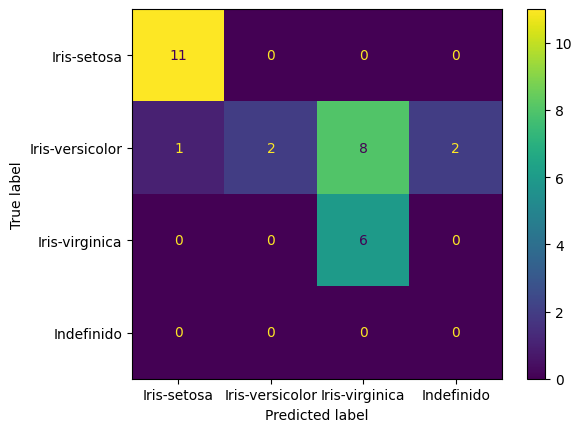

In [55]:
# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.append(desired_classes, 'Indefinido'))
disp.plot()
plt.show()